<a href="https://colab.research.google.com/github/Kishan-Ved/MLDeepLab/blob/main/logistic_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Logistic Regression**
The following describes in detail the algorithm of Logistic Regression for mltiple features represented by the vector x.

###**Cost Function**

In [1]:
import numpy as np

def cost_func(x,y,w,b):
  cost = 0
  n_points = y.shape[0]
  for i in range(n_points):
    f = 1/(1 + np.exp(-1*(np.dot(w,x[i])+b))) # Sigmoid function
    cost += (-y[i]*np.log(f)-(1-y[i])*np.log(1-f))
  cost = cost/(n_points)
  return cost

###**Derivative Function**

In [2]:
def derivative_func(x,y,w,b):
  n_points = y.shape[0]
  n_features = x[0].shape[0]
  dw = np.zeros(n_features) # Dont use [0]*n_features, as then the datatype becomes int and it truncates every element up to the decimal, do dw[i] is always 0
  db = 0
  for i in range(n_points):
    f = 1/(1 + np.exp(-1*(np.dot(w,x[i])+b))) # Sigmoid function
    for j in range(n_features):
      dw[j] += (f - y[i])*x[i][j]/n_points
    db += (f - y[i])/n_points
  return dw, db

In [3]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
w = np.array([2.,3.])
b = 1.
dw,db = derivative_func(x_train, y_train, w, b)
print(dw, db)

[0.49833339 0.49883943] 0.49861806546328574


###**Gradient Descent Function**

In [4]:
def grad_desc(x,y,w,b,a,n,derivative_func, cost_func):
  cost_arr = []
  for i in range(n):
    dw,db = derivative_func(x,y,w,b)
    w = w - a * dw
    b = b - a * db
    cost = cost_func(x,y,w,b)
    cost_arr.append(cost)
    if(i%10000==0 or i==n-1):
      print("iteration:",i+1,"w:", w,"b:", b, "cost:", cost)
  return w, b, cost, cost_arr

###**Implementation**

In [5]:
import numpy as np
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
w = np.array([0,0])
b = 0
a = 0.01
n = 100000

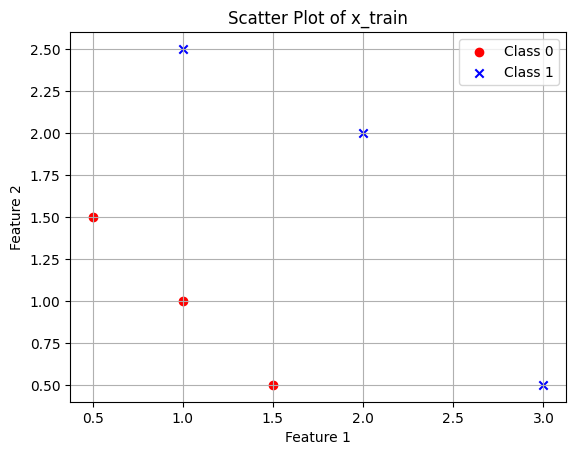

In [6]:
import matplotlib.pyplot as plt
class_0_points = x_train[y_train == 0]
class_1_points = x_train[y_train == 1]

plt.scatter(class_0_points[:, 0], class_0_points[:, 1], c='red', marker='o', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], c='blue', marker='x', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of x_train')
plt.legend()
plt.grid(True)
plt.show()

###**Result of the model**

In [7]:
w,b,cost,cost_arr = grad_desc(x_train, y_train, w, b, a, n, derivative_func, cost_func)

iteration: 1 w: [0.0025     0.00166667] b: -2.7755575615628914e-19 cost: 0.6922493145189493
iteration: 10001 w: [2.30405443 2.07569485] b: -5.906224646656873 cost: 0.15929433526969025
iteration: 20001 w: [3.15399029 2.9391181 ] b: -8.308406449661286 cost: 0.08467022766207012
iteration: 30001 w: [3.68009634 3.47013631] b: -9.779995117023205 cost: 0.05708873095289405
iteration: 40001 w: [4.05958107 3.85211168] b: -10.836781277572722 cost: 0.042929169405013574
iteration: 50001 w: [4.35591528 4.14993563] b: -11.659973341953908 cost: 0.03435304388535467
iteration: 60001 w: [4.59881057 4.3938154 ] b: -12.333644748840326 cost: 0.02861432636904086
iteration: 70001 w: [4.80451141 4.60021177] b: -12.903521835706426 cost: 0.02450955388769534
iteration: 80001 w: [4.98285153 4.77906746] b: -13.39718959763814 cost: 0.02142997830044766
iteration: 90001 w: [5.14022947 4.93684162] b: -13.832552219301215 cost: 0.019035206450251734
iteration: 100000 w: [5.28102582 5.07795116] b: -14.22184473980357 cost: 

##**Plotting the decision boundary**

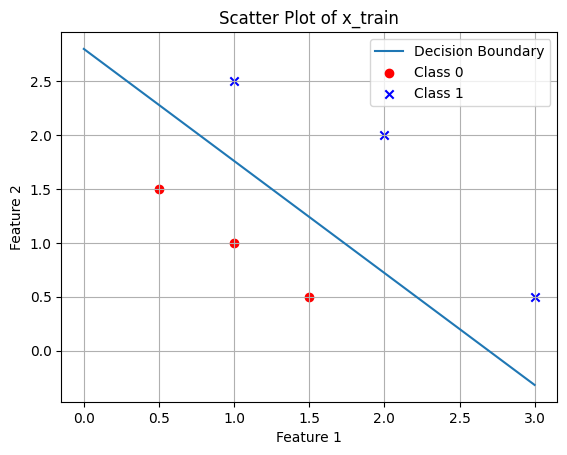

In [8]:
x0 = np.arange(0,3,0.001)
x1 = (-b-w[0]*x0)/w[1] # This is the decision boundary
plt.plot(x0,x1,label='Decision Boundary')
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], c='red', marker='o', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], c='blue', marker='x', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of x_train')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def derivative_func(x,y,w,b):
  n_points = y.shape[0]
  n_features = x.shape[0]
  dw = 0 # Dont use [0]*n_features, as then the datatype becomes int and it truncates every element up to the decimal, do dw[i] is always 0
  db = 0
  for i in range(n_points):
    f = 1/(1 + np.exp(-1*(np.dot(w,x[i])+b))) # Sigmoid function
    dw += (f - y[i])*x[i]/n_points
    db += (f - y[i])/n_points
  return dw, db

import numpy as np
x_train = np.array([0. ,1. ,2. ,3. ,4. ,5.])
y_train = np.array([0., 0., 0., 1., 1., 1.])
w = 0.
b = 0
a = 0.01
n = 100000

w,b,cost,cost_arr = grad_desc(x_train, y_train, w, b, a, n, derivative_func, cost_func)

iteration: 1 w: 0.0075 b: -2.7755575615628914e-19 cost: 0.6875866309962527
iteration: 10001 w: 2.1867501108184713 b: -5.16917809323396 cost: 0.11340307961302272
iteration: 20001 w: 2.861115544430589 b: -6.907170232585448 cost: 0.07798162891279302
iteration: 30001 w: 3.3342040584439254 b: -8.111040905678628 cost: 0.061142541357167964
iteration: 40001 w: 3.7092655036875835 b: -9.060256188655838 cost: 0.05069045939178313
iteration: 50001 w: 4.023241491259317 b: -9.852492089866404 cost: 0.04341259172881062
iteration: 60001 w: 4.294480337340172 b: -10.535609693427636 cost: 0.038002132335623905
iteration: 70001 w: 4.533744351000855 b: -11.137432454212933 cost: 0.033802915742773575
iteration: 80001 w: 4.748012696977043 b: -11.675891049855071 cost: 0.030441380223630285
iteration: 90001 w: 4.942123793732626 b: -12.163359911131781 cost: 0.027686301223508947
iteration: 100000 w: 5.119578248398071 b: -12.608762220986433 cost: 0.025385931832151234


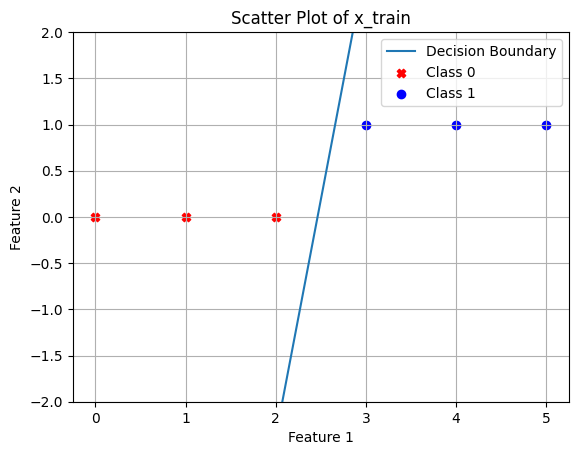

In [10]:
x = np.arange(0,3,0.001)
y = w*x + b # This is the decision boundary
plt.plot(x,y,label='Decision Boundary')

class_0_points = x_train[y_train == 0]
class_1_points = x_train[y_train == 1]
plt.scatter(class_0_points,y_train[0:3], c='red', marker='X', label='Class 0')
plt.scatter(class_1_points,y_train[3:], c='blue', marker='o', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of x_train')
plt.ylim([-2,2])
plt.legend()
plt.grid(True)
plt.show()

##**We can further refine the learning rate as in my gradient descent google colab**